In [10]:
!pip install tensorflow.compat.v2

zsh:1: command not found: py


In [11]:
# Import statement

from keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score
from sklearn import tree
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [12]:
# Load the MNIST data
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print('train_x dimensions: ' + str(train_x.shape))
print('train_y dimensions: ' + str(train_y.shape))
print('test_x dimensions:  '  + str(test_x.shape))
print('test_y dimensions:  '  + str(test_y.shape))

NameError: name 'mnist' is not defined

In [ ]:
# Reshape image into column vector
n_train = train_x.shape[0]
n_test = test_x.shape[0]
m = train_x.shape[1] * train_x.shape[2] 
train_X = train_x.reshape((n_train, m)).T
test_X = test_x.reshape((n_test, m)).T
print('train_X dimensions: ' + str(train_X.shape))
print('test_X dimensions: '  + str(test_X.shape))
X = np.hstack((train_X, test_X))
print('X dimensions: ' + str(X.shape))
Y = np.hstack((train_y, test_y))
print('Y dimensions: ' + str(Y.shape))

In [ ]:
# SVD analysis
U, S, Vt = linalg.svd(X, full_matrices=False)


In [ ]:
print('U dimensions: ' + str(U.shape))
print('VT dimensions: '  + str(Vt.shape))

In [ ]:
# Plot singular value spectrum
r = np.arange(S.shape[0])
plt.figure()
plt.title('Singular Value Spectrum')
plt.plot(r, S)
plt.ylabel('Singular Value')
plt.xlabel('Rank')
plt.show()

In [ ]:
# Matrix U is a 784 by 784 matrix where the columns represent the orthonormal basis or 
# principal components of the data matrix
# Matrix Sigma is 784 by 784 diagonal matrix that contain the singular values which scale the vectors in matrix U
# ordered in descending order
# Matrix
plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    img = U[:,i].reshape((28,28))
    plt.imshow(img)
plt.show()

In [ ]:
# Project data onto the columns 2,3 and 5
k = np.array([2,3,5]) - 1
X_proj = np.diag(S)@Vt
X_proj = X_proj[k,:]
print(X_proj.shape)

In [ ]:
# 3D plot the projected data with each digit having different color
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
c_map = [colors[i] for i in Y]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
ax.set_title('Projection onto V-modes 2,3,5')
ax.scatter(X_proj[0,:], X_proj[1,:], X_proj[2,:], c=c_map)
ax.set_xlabel('Principal Component 2')
ax.set_ylabel('Principal Component 3')
ax.set_zlabel('Principal Component 5')
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.tight_layout()
plt.show()

In [ ]:
# Function to prepare data for a two digits classifier
def get_2digits(x, y, d1, d2):
    index = [i for i in range(len(y)) if y[i] == d1 or y[i] == d2]
    X = x[index,:]
    Y = y[index]
    #Y = np.array([1 if y == 1 else -1 for y in Y])
    return X, Y

# Function to prepare data for a three digits classifier
def get_3digits(x, y, d1, d2, d3):
    index = [i for i in range(len(y)) if y[i] == d1 or y[i] == d2 or y[i] == d3]
    X = x[index,:]
    Y = y[index]
    return X, Y

In [ ]:
# Project onto top 100 principal components
k = 200
train_xp = train_X.T@U[:,:k]
test_xp = test_X.T@U[:,:k]
print(train_xp.shape)
print(test_xp.shape)

In [ ]:
#Fit the LDA model to classify two digits (1, 8)
train_x2, train_y2 = get_2digits(train_xp, train_y, 1, 8)
test_x2, test_y2 = get_2digits(test_xp, test_y, 1, 8)

model = LinearDiscriminantAnalysis()
model.fit(train_x2, train_y2)
y_pred = model.predict(test_x2)
acc = accuracy_score(test_y2, y_pred)
print('Two digits Classification (1,8) Accuracy:', acc)

In [ ]:
#Fit the LDA model to classify three digits (1,4,8)
train_x3, train_y3 = get_3digits(train_xp, train_y, 1, 3, 8)
test_x3, test_y3 = get_3digits(test_xp, test_y, 1, 3, 8)
model = LinearDiscriminantAnalysis()
model.fit(train_x3, train_y3)
y_pred = model.predict(test_x3)
acc = accuracy_score(test_y3, y_pred)
print('Three digits Classification (1,4,8) Accuracy:', acc)

In [ ]:
#Fit the LDA model to classify all digits
model = LinearDiscriminantAnalysis()
model.fit(train_xp, train_y)
y_pred = model.predict(test_xp)
acc = accuracy_score(test_y, y_pred)
print('Classification Accuracy:', acc)

In [ ]:
# Find accuracy of speration for all two digits pair
# Generate all unique pairs
pairs = []
for i in range(10):
    for j in range(10):
        if (i,j) not in pairs and (j,i) not in pairs and i != j:
            pairs.append((i,j))
print(pairs)

In [ ]:
# Compute accuracy of LDA for all digits pair
acc_arr = []
for pair in pairs:
    train_x2, train_y2 = get_2digits(train_xp, train_y, pair[0], pair[1])
    test_x2, test_y2 = get_2digits(test_xp, test_y, pair[0], pair[1])
    model = LinearDiscriminantAnalysis()
    model.fit(train_x2, train_y2)
    y_pred = model.predict(test_x2)
    acc_arr.append(accuracy_score(test_y2, y_pred))
print(acc_arr)

In [ ]:
# Find two digits that 
acc_arr = np.array(acc_arr)
index = np.argsort(acc_arr)
min_index = index[0]
max_index = index[-1]
print('Digits pair most difficult to separate', pairs[min_index], 'accuracy:', acc_arr[min_index])
print('Digits pair most easy to separate', pairs[max_index], 'accuracy:', acc_arr[max_index])

In [ ]:
# SVM Classifier on all digits
clf = SVC()
clf.fit(train_xp, train_y)
y_pred = clf.predict(train_xp)
acc = accuracy_score(train_y, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_xp)
acc = accuracy_score(test_y, y_pred)
print('Testing Accuracy:', acc)

In [ ]:
# Decision Tree Classifier on all digits
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_xp, train_y)
y_pred = clf.predict(train_xp)
acc = accuracy_score(train_y, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_xp)
acc = accuracy_score(test_y, y_pred)
print('Testing Accuracy:', acc)

In [ ]:
# Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair of digits to separate

train_x2_min, train_y2_min = get_2digits(train_xp, train_y, pairs[min_index][0], pairs[min_index][1])
test_x2_min, test_y2_min = get_2digits(test_xp, test_y, pairs[min_index][0], pairs[min_index][1])

train_x2_max, train_y2_max = get_2digits(train_xp, train_y, pairs[max_index][0], pairs[max_index][1])
test_x2_max, test_y2_max = get_2digits(test_xp, test_y, pairs[max_index][0], pairs[max_index][1])

print('Digits pair most difficult to separate', pairs[min_index])
print('SVM Classification')
clf = SVC()
clf = clf.fit(train_x2_min, train_y2_min)
y_pred = clf.predict(train_x2_min)
acc = accuracy_score(train_y2_min, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_min)
acc = accuracy_score(test_y2_min, y_pred)
print('Testing Accuracy:', acc)

print('Decision Tree Classification')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x2_min, train_y2_min)
y_pred = clf.predict(train_x2_min)
acc = accuracy_score(train_y2_min, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_min)
acc = accuracy_score(test_y2_min, y_pred)
print('Testing Accuracy:', acc)
print()

print('Digits pair most easy to separate', pairs[max_index])
print('SVM Classification')
clf = SVC()
clf = clf.fit(train_x2_max, train_y2_max)
y_pred = clf.predict(train_x2_max)
acc = accuracy_score(train_y2_max, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_max)
acc = accuracy_score(test_y2_max, y_pred)
print('Testing Accuracy:', acc)


print('Decision Tree Classification')
clf = clf.fit(train_x2_max, train_y2_max)
y_pred = clf.predict(train_x2_max)
acc = accuracy_score(train_y2_max, y_pred)
print('Training Accuracy:', acc)
y_pred = clf.predict(test_x2_max)
acc = accuracy_score(test_y2_max, y_pred)
print('Testing Accuracy:', acc)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D


In [4]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
X /= 255
X = X.T


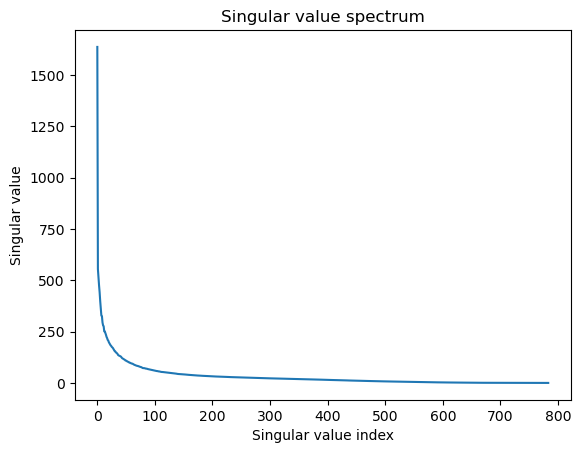

In [5]:
svd = TruncatedSVD(n_components=784, random_state=0)
svd.fit(X)
plt.plot(svd.singular_values_)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular value spectrum')
plt.show()


The interpretation of the U, Σ, and V matrices in the SVD decomposition is as follows:

The matrix U contains the left singular vectors, which are the directions in the original feature space that capture the most variation in the data.
The matrix Σ contains the singular values, which represent the amount of variation captured by each singular vector.
The matrix V contains the right singular vectors, which are the directions in the image space that correspond to the most important features of the digits.

To project the digit images onto three selected V-modes, we can first compute the matrix multiplication of X and the first three columns of V. We will also extract the label for each digit image.

In [ ]:
U, s, V = np.linalg.svd(X)
proj = np.dot(X.T, V[:, [1, 2, 4]])
labels = np.array(mnist.target.astype(int))


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj[:,0], proj[:,1], proj[:,2], c=labels, cmap=plt.cm.get_cmap('jet', 10))
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')
plt.show()
